In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('ukrain_war_snscrape_jigme2.csv')

In [ ]:
df.head(5)

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place
0,mic_marek,2018-11-10 14:01:32+00:00,12228,830,0,en,2022-11-27 19:20:18+00:00,0,Twitter Web App,1596947040432709633,1/3 The #Russia #propaganda apparatus permanen...,"['Russia', 'propaganda', 'NATO']",1596947040432709633,NaN,NaN,NaN
1,10WallStreet,2012-08-26 19:26:27+00:00,1108,607,1,en,2022-11-27 19:16:01+00:00,1,Twitter for Android,1596945959065645056,"#NATO, #EU &amp; #TheWest Got Itself in a Mess...","['NATO', 'EU', 'TheWest', 'Ukraine', 'BidenFam...",1596719680416268290,https://twitter.com/10WallStreet,NaN,NaN
2,onsaledrones,2020-05-07 19:01:27+00:00,130,9,0,en,2022-11-27 19:15:35+00:00,0,dlvr.it,1596945849929863168,#Russia #RussiaUkraineWar NATO Drones Attempte...,"['Russia', 'RussiaUkraineWar']",1596945849929863168,NaN,NaN,NaN
3,FreeAgentBobby,2020-01-03 05:36:35+00:00,365,33,0,en,2022-11-27 19:15:25+00:00,0,Twitter for iPhone,1596945808619757570,306\n#Allah #ImamMahdi (atf) #Religion #War #M...,"['Allah', 'ImamMahdi', 'Religion', 'War', 'Mil...",1596945808619757570,NaN,NaN,NaN
4,ElayneStainto10,2022-10-12 14:48:36+00:00,25,122,0,en,2022-11-27 19:12:42+00:00,0,Twitter for Android,1596945125149581317,Threaten Against to @wef is dying.\n#Russia no...,['Russia'],1596945125149581317,NaN,NaN,NaN


# Extracing only Tweets from October

In [ ]:
start_date='2022-10-01 00:00:00+00:00'
end_date='2022-11-01 00:00:00+00:00'
df_oct = df[df['Date_Tweet'].between(start_date,end_date)]

In [ ]:
df_oct.head(3)

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place
29405,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,"""That doesn't mean[..]that #Russia can't splin...","['Russia', 'war', 'Putin', 'Russian']",1587231188447535105,https://twitter.com/Europaetal,NaN,NaN
29406,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,Ukraine starts work on signing declarations wi...,"['NATO', 'Ukraine', 'UkraineWillWin', 'Ukraina...",1587232353021214722,NaN,NaN,NaN
29407,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,"Part 2 of 2/\nNov 3, Q&amp;A: #West #Misconcep...","['West', 'Misconceptions', 'Misconceptions', '...",1587230281777520643,https://twitter.com/Starbright489,NaN,NaN


In [ ]:
print('No of tweets from October :',df_oct.shape[0])

No of tweets from October : 32652


Checking data types

In [ ]:
df_oct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32652 entries, 29405 to 62056
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User             32652 non-null  object
 1   Date_Created     32652 non-null  object
 2   Follows_Count    32652 non-null  int64 
 3   Friends_Count    32652 non-null  int64 
 4   Retweet_Count    32652 non-null  int64 
 5   Language         32652 non-null  object
 6   Date_Tweet       32652 non-null  object
 7   Number_of_Likes  32652 non-null  int64 
 8   Source_of_Tweet  32652 non-null  object
 9   Tweet_Id         32652 non-null  int64 
 10  Tweet            32652 non-null  object
 11  Hashtags         32645 non-null  object
 12  Conversation_Id  32652 non-null  int64 
 13  In_reply_To      4681 non-null   object
 14  Coordinates      387 non-null    object
 15  Place            387 non-null    object
dtypes: int64(6), object(10)
memory usage: 4.2+ MB


# Removing duplicate tweets

In [ ]:
df_oct.drop_duplicates(subset=['Tweet_Id'],inplace=True,ignore_index=True) # removing duplicates
print("After removing duplicates:",df_oct.shape)

After removing duplicates: (32652, 16)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


So, no duplicate tweets

# visualise tweet frequency by date

In [ ]:
df_oct['Date_Tweet1']= pd.to_datetime(df_oct.Date_Tweet, format='%Y-%m-%d')

<ipython-input-9-8eccd5437427>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct['Date_Tweet1']= pd.to_datetime(df_oct.Date_Tweet, format='%Y-%m-%d')


In [ ]:
df_oct.head(3)

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1
0,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,"""That doesn't mean[..]that #Russia can't splin...","['Russia', 'war', 'Putin', 'Russian']",1587231188447535105,https://twitter.com/Europaetal,NaN,NaN,2022-10-31 23:59:45+00:00
1,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,Ukraine starts work on signing declarations wi...,"['NATO', 'Ukraine', 'UkraineWillWin', 'Ukraina...",1587232353021214722,NaN,NaN,NaN,2022-10-31 23:57:36+00:00
2,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,"Part 2 of 2/\nNov 3, Q&amp;A: #West #Misconcep...","['West', 'Misconceptions', 'Misconceptions', '...",1587230281777520643,https://twitter.com/Starbright489,NaN,NaN,2022-10-31 23:49:24+00:00


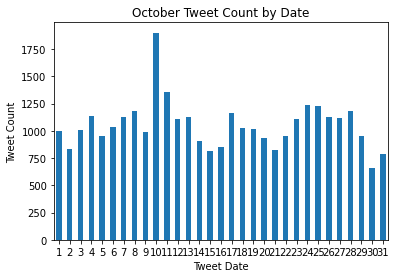

In [ ]:
# get dates from the dataframe 
dates = df_oct["Date_Tweet1"].dt.day
# group tweet timestamps by date and get tweet count for each date
tweetcount_by_date = df_oct["Date_Tweet1"].groupby(dates).size()

# plot bar graph of tweet count by date
tweetcount_by_date.plot.bar();

plt.title("October Tweet Count by Date")
plt.xlabel("Tweet Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()

**Why is no of tweets maximum on 10th october?**
G-7 leaders to hold emergency meeting on Ukraine; Russian missile strikes draw angry condemnation.

Russian strikes kill 17 in Ukraine following bridge 
attack

Oct 8: Crimean Bridge was destroyed. For Ukrainians, the bridge was a reminder of Russia’s occupation and their inability to act against Russia, it was built in 2014.

# To-Do:Analyse top grams or words on October8, 9 and 10

# NO of languages in data set

In [ ]:
print(f"There are {df_oct['Language'].nunique()} unique languages in this DataFrame.")
print(df_oct["Language"].unique())

There are 54 unique languages in this DataFrame.
['en' 'hu' 'el' 'tr' 'ru' 'it' 'es' 'und' 'qht' 'fr' 'te' 'qme' 'de' 'hi'
 'cs' 'bn' 'pa' 'in' 'ro' 'ja' 'uk' 'fa' 'mr' 'pl' 'nl' 'ca' 'kn' 'ta'
 'ur' 'vi' 'eu' 'zh' 'gu' 'et' 'pt' 'ht' 'fi' 'tl' 'no' 'sl' 'ne' 'da'
 'lt' 'lv' 'th' 'ar' 'ml' 'ko' 'cy' 'or' 'sv' 'sr' 'iw' 'bg']


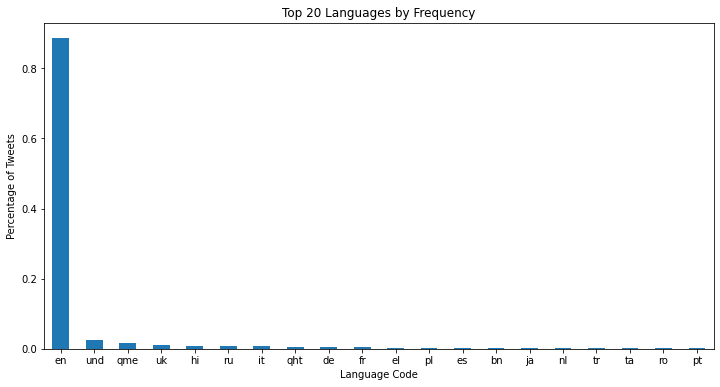

In [ ]:
language_counts = df_oct.groupby("Language").size().sort_values(ascending=False)[0:20]
language_counts=language_counts/len(df_oct)
language_counts.plot.bar(figsize=(12,6),title="Top 20 Languages by Frequency",xlabel="Language Code", ylabel="Percentage of Tweets", rot=90)
plt.xticks(rotation=0)
plt.show()

It can be seen the English is the most prevalant language in this data set by far. Followed by "und".
"und" means twitter could not detect a language.

Let us see rows with "und".

In [ ]:
language_und = df_oct.loc[df_oct["Language"]=="und"]
pd.set_option('display.max_colwidth', None)
language_und["Tweet"]

251                              #Ukraine #Russia #War #RussianAggression #VisaBanForRussians #RussianWarCrimes #RussiaIsATerroristState\n#RussiaIsANaziState #StopRussiaNOW\n#ArmUkraineNOW #ArmUkraineMORE #SlavaUkraini #HeroyamSlava🌻🇺🇦🌻
256      #Ukraine #Russia #War #RussianAggression #VisaBanForRussians #RussianWarCrimes #RussiaIsATerroristState\n#RussiaIsANaziState  #StopRussiaNOW #IranIsATerroristState\n#ArmUkraineNOW #ArmUkraineMORE #SlavaUkraini #HeroyamSlava🌻🇺🇦🌻
264                                           Russia Ukraine War Update Live : महायुद्ध के लिए पुतिन तैयार है Worldwar | Putin | Biden | Zelensky\n#Russia #Ukraine #UnitedStates #Kherson #UkraineWar #Kaliningrad\nhttps://t.co/FEl2wJ1OyX
609                                                                                                                     https://t.co/94vUviHV6i via https://t.co/XKwF5uhjMk #ukraine #ukrainelive #russia #war #ukrainian #ukrainearmy #army
613                                                 

Thesese tweets appears to be full of ##hashtags. There are also tweets written in Hindi mixed with English.

#A tweet can have 280 characters max. 



The average word in the English language is 4.7 characters. That means a tweet is a word of approx 280/4.7 i.e around 60 words.

Distributuion of Tweets Length

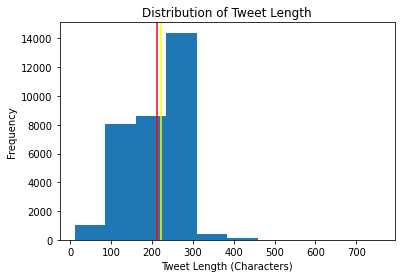

Mean: 213.28310670096778 chars
Median: 223.0 chars
Standard deviation: 70.39507663568094 chars


In [ ]:
tweet_len_series = df_oct["Tweet"].str.len()
tweet_len_series.plot.hist();
plt.title("Distribution of Tweet Length")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
# draw a vertical line for the mean
plt.axvline(x=tweet_len_series.mean(), color="red")
# draw a vertical line for the median
plt.axvline(x=tweet_len_series.median(), color="yellow")
plt.show()

print(f"Mean: {tweet_len_series.mean()} chars")
print(f"Median: {tweet_len_series.median()} chars")
print(f"Standard deviation: {tweet_len_series.std()} chars")

Most Tweets length is between 100 and 300 chars with few outliers with huge lenth of more than 400.

In [ ]:
# get the number of rows missing location info
missing_location_count = df_oct.loc[df_oct["Place"].isna()].shape[0]
print(f"{missing_location_count} rows are missing location information.")
print(f"{round(missing_location_count/df_oct.shape[0]*100,2)}% of the rows are missing location information.")

32265 rows are missing location information.
98.81% of the rows are missing location information.


Since almost all "location" elements are missing. These column is no use for us.

## Hashtag analysis

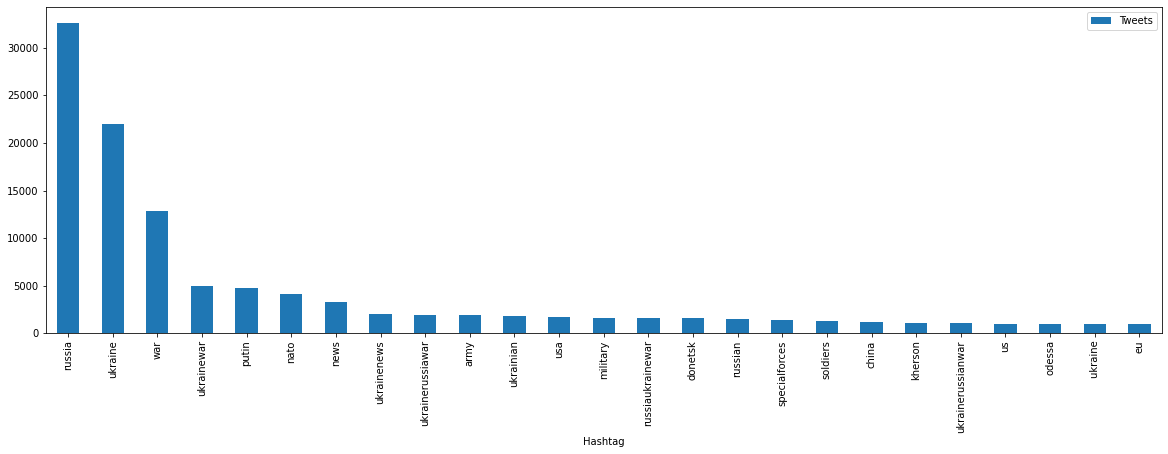

In [ ]:
from collections import Counter
def evaluate_hashtags(x):
    ##function returns list of words from column Hastag##
    hashtags = []
    a = eval(str(x))
    for item in a:
        hashtags.append(item.lower())
        hashtags = list(set(hashtags))   
    return hashtags

hash=df_oct[["Hashtags"]].dropna() ## creating dataframe without null value in Hashtag column

hashtagsListCollection = hash["Hashtags"].apply(evaluate_hashtags)
masterlist = []
for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        masterlist.append(hashtag)
topXItem = 25

x = Counter(masterlist)
topXItemList = x.most_common(topXItem)

df_hash = pd.DataFrame(topXItemList)
df_hash.columns =['Hashtag','Tweets']
dfpivot = df_hash.T
new_header = dfpivot.iloc[0]
dfpivot = dfpivot[1:]
dfpivot.columns = new_header 
plt.rcParams["figure.figsize"] = [20, 6]
df_hash.plot.bar(x='Hashtag', y='Tweets', rot=90)
plt.show()


**Donetsk** has been a major economic, industrial and scientific centre of Ukraine with a high concentration of heavy industries and a skilled workforce

**Kherson** is a port city of Ukraine that serves as the administrative centre of Kherson Oblast. Located on the Black Sea and on the Dnieper River

Find what happened in Kherson and Donetsk?? Why was it trending??

# Preprocessing Text Data

As we know, tweets can contain lot of micelleneous information apart from text such as URLs and Symbols that should be removed. Upper case and Lower case are unified into Lower case . Mentions and hashtags are removed. Though emojis can be useful for sentiment but we will remove them here for simplicity. We will also remove punctuation and numbers from the tweets.

Finalyy tweets are stemmed into its root word using Lemmatization.

## check whether there are any missing Tweets


In [ ]:
df_oct['Tweet'].isna().any()

False

##1. convert everything to Lower Case 

In [ ]:
df_oct['lower']=df_oct['Tweet'].str.lower()

<ipython-input-19-ba20b2f047e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct['lower']=df_oct['Tweet'].str.lower()


## 2. HTML, Hashtags, Mentions, Digits, and Emojis

In [ ]:
!pip install tweet-preprocessor
import preprocessor as p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def remove_unnecessary(text):
    # INPUT: string (tweet)
    # OUTPUT: string without URLs, mentions, hashtags, digist, and emojis (and smileys)
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.NUMBER, p.OPT.EMOJI, p.OPT.SMILEY)
    result = p.clean(text)
    return result

In [ ]:
df_oct["cleaned_text"] = df_oct['lower'].map(remove_unnecessary)
df_oct["cleaned_text"].head(4)

<ipython-input-22-0ac0c86f4f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct["cleaned_text"] = df_oct['lower'].map(remove_unnecessary)


0    "that doesn't mean[..]that can't splinter.the human&amp;econom.effects of this have been spread unevenly[..]&amp; [..]reliance on ethnic nationalism&amp;identity politics[..]can't help but alienate those citiz.who +closely identify w/other cultures&amp;heritages"
1                                                                                                                                                                                                               ukraine starts work on signing declarations with all members
2                                                                                               part of / nov , q&amp;a: ..theyll discuss the still has about &amp; . its an *exclusive event for our community*. become a member &amp; &amp; submit your questions at link.
3                            lula's top foreign policy advisor: "lula opposes sanctions on russia, because they increase the risk of nuclear war. instead, lula will continue the policy he previ

## 3. Remove HTML entities

The most common ones are "&amp" and "\n". We will replace these with empty string.

In [ ]:
df_oct['cleaned_text']=df_oct['cleaned_text'].str.replace("&amp","")

<ipython-input-23-f18a74acabda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct['cleaned_text']=df_oct['cleaned_text'].str.replace("&amp","")


## 5.Remove Stop words

In [ ]:
# import nltk package to find stopwords
import nltk
from nltk.corpus import stopwords  
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df_oct['cleaned_text'] = df_oct['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-24-b5164289b620>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct['cleaned_text'] = df_oct['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


## 4. Remove Punctuations

In [ ]:
df_oct['cleaned_text']

0        "that mean[..]that can't splinter.the human;econom.effects spread unevenly[..]; [..]reliance ethnic nationalism;identity politics[..]can't help alienate citiz.who +closely identify w/other cultures;heritages"
1                                                                                                                                                                        ukraine starts work signing declarations members
2                                                                                                      part / nov , q;a: ..theyll discuss still ; . *exclusive event community*. become member ; ; submit questions link.
3                       lula's top foreign policy advisor: "lula opposes sanctions russia, increase risk nuclear war. instead, lula continue policy previously followed president pursuing close diplomatic ties russia."
4                                                                                                                               

In [ ]:
# using the 're.sub' to remove punctuation.
import re
def remove_punctuation(text):
    text = re.sub(r"[^\w\s]", "", text)
    return text
df_oct["cleaned_text"] = df_oct["cleaned_text"].apply(remove_punctuation)

<ipython-input-26-7527bd11ea2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct["cleaned_text"] = df_oct["cleaned_text"].apply(remove_punctuation)


In [ ]:
df_oct["cleaned_text"]

0              that meanthat cant splinterthe humaneconomeffects spread unevenly reliance ethnic nationalismidentity politicscant help alienate citizwho closely identify wother culturesheritages
1                                                                                                                                                 ukraine starts work signing declarations members
2                                                                                             part  nov  qa theyll discuss still   exclusive event community become member   submit questions link
3        lulas top foreign policy advisor lula opposes sanctions russia increase risk nuclear war instead lula continue policy previously followed president pursuing close diplomatic ties russia
4                                                                                                           striking ukraine wants visual media war whereupon russia want hide shortcomings plenty
                         

## 5. Stemming with Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def stemming(text):
  return  wnl.lemmatize(text)
df_oct['cleaned_text']= df_oct['cleaned_text'].apply(lambda x: stemming(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-28-3ec1c40150b5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct['cleaned_text']= df_oct['cleaned_text'].apply(lambda x: stemming(x))


In [ ]:
df_oct['cleaned_text']

0              that meanthat cant splinterthe humaneconomeffects spread unevenly reliance ethnic nationalismidentity politicscant help alienate citizwho closely identify wother culturesheritages
1                                                                                                                                                 ukraine starts work signing declarations members
2                                                                                             part  nov  qa theyll discuss still   exclusive event community become member   submit questions link
3        lulas top foreign policy advisor lula opposes sanctions russia increase risk nuclear war instead lula continue policy previously followed president pursuing close diplomatic ties russia
4                                                                                                           striking ukraine wants visual media war whereupon russia want hide shortcomings plenty
                         

## word cloud visualisation before Sentiment Analysis



In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

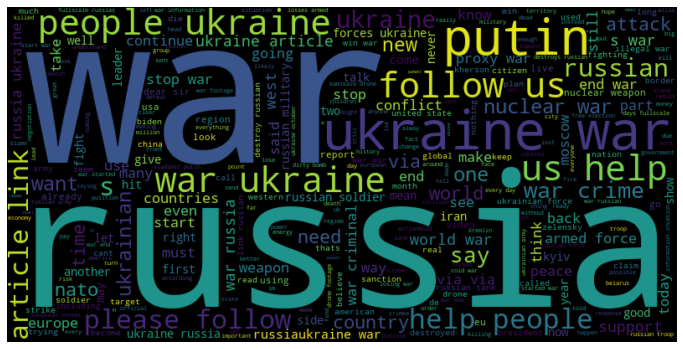

In [ ]:
# concatenate all tweets in cleaned_text column into one long string for wordcloud to accept
text = " ".join(tweet for tweet in df_oct["cleaned_text"])
wc = WordCloud(width=800, height=400, max_words=300).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## word cloud visualisation before Sentiment Analysis of 8th,9th and 10th october 2022

In [ ]:
start_date='2022-10-08 00:00:00+00:00'
end_date='2022-11-01 00:00:00+00:00'
df_imp = df_oct[df_oct['Date_Tweet'].between(start_date,end_date)]

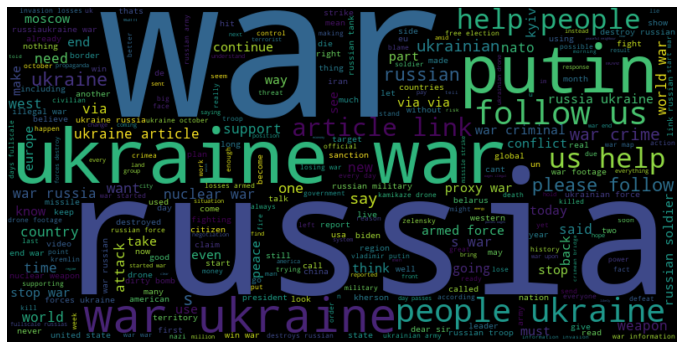

In [ ]:
# concatenate all tweets in cleaned_text column into one long string for wordcloud to accept
text = " ".join(tweet for tweet in df_imp["cleaned_text"])
wc = WordCloud(width=800, height=400, max_words=300).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Visualising top n-grams from  Month of October

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
import seaborn as sns

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

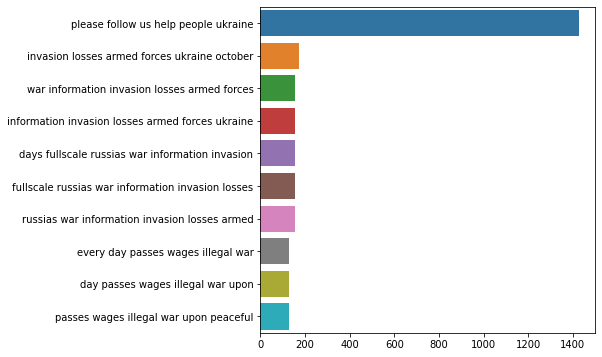

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(6.0,6.0)  

# lets take a look at 6 letters most common in tweets
plot_top_ngrams_barchart(df_oct['cleaned_text'],6)

## Visualising top n grams from 8th, 9th ,10th and 11th october

In [ ]:
start_date='2022-10-10 00:00:00+00:00'
end_date='2022-10-11 00:00:00+00:00'
df_imp = df_oct[df_oct['Date_Tweet'].between(start_date,end_date)]

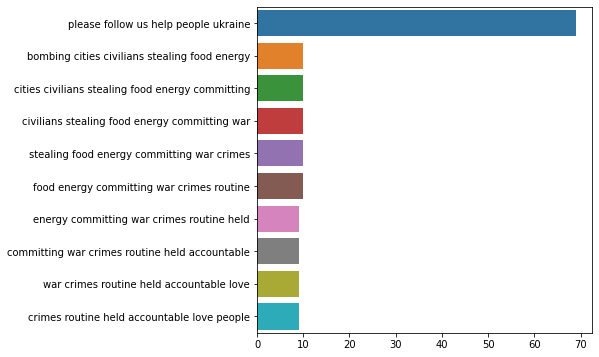

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(6.0,6.0)  

# lets take a look at 6 letters most common in tweets
plot_top_ngrams_barchart(df_imp['cleaned_text'],6)

Find the most discussed topics during these days:

1.

2.

3.

## visualise tweets that received most retweets


# Sentiment Prediction 

Sentiment is predicted based on majority votings from 3 models
1. aws
2. best trained model from part 1 of the project
3. vaeder

## 1. AWS

AWS Boto library requires an earlier version of urlib3 so install that first and then install boto3. This is the platform aws uses with python.

In [ ]:
!pip install urllib3==1.25.11
!pip -q install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 6.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
     |████████████████████████████████| 132 kB 8.0 MB/s 
     |████████████████████████████████| 79 kB 6.8 MB/s 
     |████████████████████████████████| 10.2 MB 59.4 MB/s 


Create Directory in root folder called aws

In [ ]:
!mkdir ~/.aws

Create file called credentials.

In [ ]:
!touch ~/.aws/credentials

Check to see if file name is created in aws folder

In [ ]:
!ls -la ~/.aws

total 12
drwxr-xr-x 2 root root 4096 Dec  3 20:40 .
drwx------ 1 root root 4096 Dec  3 20:37 ..
-rw-r--r-- 1 root root    0 Dec  3 20:40 credentials


Write contents of MyCredentials into credentials. (Note MyCredentials is usually uploaded to current working folder which is 'content'. TO check current working folder use the !pwd command. upload the MyCredentails txt file. Without this we cannot use the aws sentiment analysis tool

In [ ]:
 !cat ./MyCredentials.txt > ~/.aws/credentials

In [ ]:
!cat ~/.aws/credentials

In [ ]:
import boto3

In [ ]:
def create_sentiment_aws(row):
    """Uses AWS Comprehend to Create Sentiments on a DataFrame"""

    try:
      comprehend = boto3.client(service_name='comprehend', region_name="us-east-2")
      AWS_Analysis = comprehend.detect_sentiment(Text=row, LanguageCode='en')  
      sentiment = AWS_Analysis['Sentiment']
    except Exception:
      print("Size exceeded:  Fail")
      return None
    return sentiment

def apply_sentiment_aws(df, column="Tweet"):
    """Uses Pandas Apply to Create Sentiment Analysis"""

    df['Sentiment'] = df[column].apply(create_sentiment_aws)
    return df

In [ ]:
#rating1 = df_oct
#rating1_senti_aws = apply_sentiment_aws(rating1)
#rating1_senti_aws.head()

<ipython-input-46-30812f8774f3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df[column].apply(create_sentiment_aws)


,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,Sentiment
0,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,"""That doesn't mean[..]that #Russia can't splinter.The human&amp;econom.effects of this #war have been spread unevenly[..]&amp; #Putin’s[..]reliance on ethnic nationalism&amp;identity politics[..]can't help but alienate those #Russian citiz.who +closely identify w/other cultures&amp;heritages""","['Russia', 'war', 'Putin', 'Russian']",1587231188447535105,https://twitter.com/Europaetal,NaN,NaN,2022-10-31 23:59:45+00:00,"""that doesn't mean[..]that #russia can't splinter.the human&amp;econom.effects of this #war have been spread unevenly[..]&amp; #putin’s[..]reliance on ethnic nationalism&amp;identity politics[..]can't help but alienate those #russian citiz.who +closely identify w/other cultures&amp;heritages""",that meanthat cant splinterthe humaneconomeffects spread unevenly reliance ethnic nationalismidentity politicscant help alienate citizwho closely identify wother culturesheritages,NEGATIVE
1,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,Ukraine starts work on signing declarations with all #NATO members\n\n#Ukraine #UkraineWillWin #Ukraina #Ucrania #War #news #RussiaIsATerroristState #RussiaUkraineWar #Russia #RussianLosses #RussiaIsANaziState #scaramouche #russiaisaterrorisstate #Ukrainian #Russian #cosplay https://t.co/z73rJKuIFt,"['NATO', 'Ukraine', 'UkraineWillWin', 'Ukraina', 'Ucrania', 'War', 'news', 'RussiaIsATerroristState', 'RussiaUkraineWar', 'Russia', 'RussianLosses', 'RussiaIsANaziState', 'scaramouche', 'russiaisaterrorisstate', 'Ukrainian', 'Russian', 'cosplay']",1587232353021214722,NaN,NaN,NaN,2022-10-31 23:57:36+00:00,ukraine starts work on signing declarations with all #nato members\n\n#ukraine #ukrainewillwin #ukraina #ucrania #war #news #russiaisaterroriststate #russiaukrainewar #russia #russianlosses #russiaisanazistate #scaramouche #russiaisaterrorisstate #ukrainian #russian #cosplay https://t.co/z73rjkuift,ukraine starts work signing declarations members,NEUTRAL
2,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,"Part 2 of 2/\nNov 3, Q&amp;A: #West #Misconceptions\n\n..They’ll discuss #Misconceptions the #West still has about #Ukraine &amp; #Russia’s #War. \n\nIt’s an *exclusive event for our @Patreon community*.\nBecome a member &amp; #Register &amp; submit your questions at link.\n\nhttps://t.co/iIDBATj1G6","['West', 'Misconceptions', 'Misconceptions', 'West', 'Ukraine', 'Russia', 'War', 'Register']",1587230281777520643,https://twitter.com/Starbright489,NaN,NaN,2022-10-31 23:49:24+00:00,"part 2 of 2/\nnov 3, q&amp;a: #west #misconceptions\n\n..they’ll discuss #misconceptions the #west still has about #ukraine &amp; #russia’s #war. \n\nit’s an *exclusive event for our @patreon community*.\nbecome a member &amp; #register &amp; submit your questions at link.\n\nhttps://t.co/iidbatj1g6",part nov qa theyll discuss still exclusive event community become member submit questions link,NEUTRAL
3,geopol_monitor,2013-08-22 09:51:47+00:00,2998,315,0,en,2022-10-31 23:49:18+00:00,0,Twitter Web App,1587230264295424001,"Lula's top foreign policy advisor: ""Lula opposes sanctions on Russia, because they increase the risk of nuclear war. Instead, Lula will continue the policy he previously followed as president of pursuing close diplomatic ties with Russia."" #Brazil #UkraineRussianWar #Russia","['Brazil', 'UkraineRussianWar', 'Russia']",1587230264295424001,NaN,NaN,NaN,2022-10-31 23:49:18+00:00,"lula's top foreign policy advisor: ""lula opposes sanctions on russia, because they increase the risk of nuclear war. instead, lula will continue the policy 

In [ ]:
rating1_senti_aws.to_csv("aws" + "_" + "oct" + "_" + "result" + ".csv", index=False)

In [ ]:
rating1_senti_aws.head(3)

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,Sentiment
0,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,"""That doesn't mean[..]that #Russia can't splinter.The human&amp;econom.effects of this #war have been spread unevenly[..]&amp; #Putin’s[..]reliance on ethnic nationalism&amp;identity politics[..]can't help but alienate those #Russian citiz.who +closely identify w/other cultures&amp;heritages""","['Russia', 'war', 'Putin', 'Russian']",1587231188447535105,https://twitter.com/Europaetal,NaN,NaN,2022-10-31 23:59:45+00:00,"""that doesn't mean[..]that #russia can't splinter.the human&amp;econom.effects of this #war have been spread unevenly[..]&amp; #putin’s[..]reliance on ethnic nationalism&amp;identity politics[..]can't help but alienate those #russian citiz.who +closely identify w/other cultures&amp;heritages""",that meanthat cant splinterthe humaneconomeffects spread unevenly reliance ethnic nationalismidentity politicscant help alienate citizwho closely identify wother culturesheritages,NEGATIVE
1,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,Ukraine starts work on signing declarations with all #NATO members\n\n#Ukraine #UkraineWillWin #Ukraina #Ucrania #War #news #RussiaIsATerroristState #RussiaUkraineWar #Russia #RussianLosses #RussiaIsANaziState #scaramouche #russiaisaterrorisstate #Ukrainian #Russian #cosplay https://t.co/z73rJKuIFt,"['NATO', 'Ukraine', 'UkraineWillWin', 'Ukraina', 'Ucrania', 'War', 'news', 'RussiaIsATerroristState', 'RussiaUkraineWar', 'Russia', 'RussianLosses', 'RussiaIsANaziState', 'scaramouche', 'russiaisaterrorisstate', 'Ukrainian', 'Russian', 'cosplay']",1587232353021214722,NaN,NaN,NaN,2022-10-31 23:57:36+00:00,ukraine starts work on signing declarations with all #nato members\n\n#ukraine #ukrainewillwin #ukraina #ucrania #war #news #russiaisaterroriststate #russiaukrainewar #russia #russianlosses #russiaisanazistate #scaramouche #russiaisaterrorisstate #ukrainian #russian #cosplay https://t.co/z73rjkuift,ukraine starts work signing declarations members,NEUTRAL
2,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,"Part 2 of 2/\nNov 3, Q&amp;A: #West #Misconceptions\n\n..They’ll discuss #Misconceptions the #West still has about #Ukraine &amp; #Russia’s #War. \n\nIt’s an *exclusive event for our @Patreon community*.\nBecome a member &amp; #Register &amp; submit your questions at link.\n\nhttps://t.co/iIDBATj1G6","['West', 'Misconceptions', 'Misconceptions', 'West', 'Ukraine', 'Russia', 'War', 'Register']",1587230281777520643,https://twitter.com/Starbright489,NaN,NaN,2022-10-31 23:49:24+00:00,"part 2 of 2/\nnov 3, q&amp;a: #west #misconceptions\n\n..they’ll discuss #misconceptions the #west still has about #ukraine &amp; #russia’s #war. \n\nit’s an *exclusive event for our @patreon community*.\nbecome a member &amp; #register &amp; submit your questions at link.\n\nhttps://t.co/iidbatj1g6",part nov qa theyll discuss still exclusive event community become member submit questions link,NEUTRAL


In [ ]:
df_oct.head(4)

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,Sentiment
0,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,"""That doesn't mean[..]that #Russia can't splinter.The human&amp;econom.effects of this #war have been spread unevenly[..]&amp; #Putin’s[..]reliance on ethnic nationalism&amp;identity politics[..]can't help but alienate those #Russian citiz.who +closely identify w/other cultures&amp;heritages""","['Russia', 'war', 'Putin', 'Russian']",1587231188447535105,https://twitter.com/Europaetal,NaN,NaN,2022-10-31 23:59:45+00:00,"""that doesn't mean[..]that #russia can't splinter.the human&amp;econom.effects of this #war have been spread unevenly[..]&amp; #putin’s[..]reliance on ethnic nationalism&amp;identity politics[..]can't help but alienate those #russian citiz.who +closely identify w/other cultures&amp;heritages""",that meanthat cant splinterthe humaneconomeffects spread unevenly reliance ethnic nationalismidentity politicscant help alienate citizwho closely identify wother culturesheritages,NEGATIVE
1,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,Ukraine starts work on signing declarations with all #NATO members\n\n#Ukraine #UkraineWillWin #Ukraina #Ucrania #War #news #RussiaIsATerroristState #RussiaUkraineWar #Russia #RussianLosses #RussiaIsANaziState #scaramouche #russiaisaterrorisstate #Ukrainian #Russian #cosplay https://t.co/z73rJKuIFt,"['NATO', 'Ukraine', 'UkraineWillWin', 'Ukraina', 'Ucrania', 'War', 'news', 'RussiaIsATerroristState', 'RussiaUkraineWar', 'Russia', 'RussianLosses', 'RussiaIsANaziState', 'scaramouche', 'russiaisaterrorisstate', 'Ukrainian', 'Russian', 'cosplay']",1587232353021214722,NaN,NaN,NaN,2022-10-31 23:57:36+00:00,ukraine starts work on signing declarations with all #nato members\n\n#ukraine #ukrainewillwin #ukraina #ucrania #war #news #russiaisaterroriststate #russiaukrainewar #russia #russianlosses #russiaisanazistate #scaramouche #russiaisaterrorisstate #ukrainian #russian #cosplay https://t.co/z73rjkuift,ukraine starts work signing declarations members,NEUTRAL
2,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,"Part 2 of 2/\nNov 3, Q&amp;A: #West #Misconceptions\n\n..They’ll discuss #Misconceptions the #West still has about #Ukraine &amp; #Russia’s #War. \n\nIt’s an *exclusive event for our @Patreon community*.\nBecome a member &amp; #Register &amp; submit your questions at link.\n\nhttps://t.co/iIDBATj1G6","['West', 'Misconceptions', 'Misconceptions', 'West', 'Ukraine', 'Russia', 'War', 'Register']",1587230281777520643,https://twitter.com/Starbright489,NaN,NaN,2022-10-31 23:49:24+00:00,"part 2 of 2/\nnov 3, q&amp;a: #west #misconceptions\n\n..they’ll discuss #misconceptions the #west still has about #ukraine &amp; #russia’s #war. \n\nit’s an *exclusive event for our @patreon community*.\nbecome a member &amp; #register &amp; submit your questions at link.\n\nhttps://t.co/iidbatj1g6",part nov qa theyll discuss still exclusive event community become member submit questions link,NEUTRAL
3,geopol_monitor,2013-08-22 09:51:47+00:00,2998,315,0,en,2022-10-31 23:49:18+00:00,0,Twitter Web App,1587230264295424001,"Lula's top foreign policy advisor: ""Lula opposes sanctions on Russia, because they increase the risk of nuclear war. Instead, Lula will continue the policy he previously followed as president of pursuing close diplomatic ties with Russia."" #Brazil #UkraineRussianWar #Russia","['Brazil', 'UkraineRussianWar', 'Russia']",1587230264295424001,NaN,NaN,NaN,2022-10-31 23:49:18+00:00,"lula's top foreign policy advisor: ""lula opposes sanctions on russia, because they increase the risk of nuclear war. instead, lula will continue the policy 

In [ ]:
df_oct["Sentiment"].unique()

array(['NEGATIVE', 'NEUTRAL', 'POSITIVE', 'MIXED'], dtype=object)

##2. Vader Sentiment Analyzer

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.9 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    #print("Overall sentiment dictionary is : ", sentiment_dict)
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    #print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "POSITIVE"
 
    elif sentiment_dict['compound'] <= - 0.05 :
        return "NEGATIVE"
 
    else :
        return "NEUTRAL"


In [ ]:
f=df.loc[:3,['Tweet']]

In [ ]:
df_oct['vader']=df_oct['Tweet'].apply(sentiment_scores)

<ipython-input-73-11b96c48175d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct['vader']=df_oct['Tweet'].apply(sentiment_scores)


In [ ]:
df_oct

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,Sentiment,vader
0,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,...,"['Russia', 'war', 'Putin', 'Russian']",1587231188447535105,https://twitter.com/Europaetal,NaN,NaN,2022-10-31 23:59:45+00:00,"""that doesn't mean[..]that #russia can't splinter.the human&amp;econom.effects of this #war have been spread unevenly[..]&amp; #putin’s[..]reliance on ethnic nationalism&amp;identity politics[..]can't help but alienate those #russian citiz.who +closely identify w/other cultures&amp;heritages""",that meanthat cant splinterthe humaneconomeffects spread unevenly reliance ethnic nationalismidentity politicscant help alienate citizwho closely identify wother culturesheritages,NEGATIVE,NEGATIVE
1,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,...,"['NATO', 'Ukraine', 'UkraineWillWin', 'Ukraina', 'Ucrania', 'War', 'news', 'RussiaIsATerroristState', 'RussiaUkraineWar', 'Russia', 'RussianLosses', 'RussiaIsANaziState', 'scaramouche', 'russiaisaterrorisstate', 'Ukrainian', 'Russian', 'cosplay']",1587232353021214722,NaN,NaN,NaN,2022-10-31 23:57:36+00:00,ukraine starts work on signing declarations with all #nato members\n\n#ukraine #ukrainewillwin #ukraina #ucrania #war #news #russiaisaterroriststate #russiaukrainewar #russia #russianlosses #russiaisanazistate #scaramouche #russiaisaterrorisstate #ukrainian #russian #cosplay https://t.co/z73rjkuift,ukraine starts work signing declarations members,NEUTRAL,NEGATIVE
2,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,...,"['West', 'Misconceptions', 'Misconceptions', 'West', 'Ukraine', 'Russia', 'War', 'Register']",1587230281777520643,https://twitter.com/Starbright489,NaN,NaN,2022-10-31 23:49:24+00:00,"part 2 of 2/\nnov 3, q&amp;a: #west #misconceptions\n\n..they’ll discuss #misconceptions the #west still has about #ukraine &amp; #russia’s #war. \n\nit’s an *exclusive event for our @patreon community*.\nbecome a member &amp; #register &amp; submit your questions at link.\n\nhttps://t.co/iidbatj1g6",part nov qa theyll discuss still exclusive event community become member submit questions link,NEUTRAL,NEGATIVE
3,geopol_monitor,2013-08-22 09:51:47+00:00,2998,315,0,en,2022-10-31 23:49:18+00:00,0,Twitter Web App,1587230264295424001,...,"['Brazil', 'UkraineRussianWar', 'Russia']",1587230264295424001,NaN,NaN,NaN,2022-10-31 23:49:18+00:00,"lula's top foreign policy advisor: ""lula opposes sanctions on russia, because they increase the risk of nuclear war. instead, lula will continue the policy he previously followed as president of pursuing close diplomatic ties with russia."" #brazil #ukrainerussianwar #russia",lulas top foreign policy advisor lula opposes sanctions russia increase risk nuclear war instead lula continue policy previously followed president pursuing close diplomatic ties russia,NEUTRAL,NEGATIVE
4,PCiesa,2021-01-07 01:13:39+00:00,16,210,0,en,2022-10-31 23:46:43+00:00,1,Twitter Web App,1587229612652003328,...,"['Ukraine', 'UkraineWar', 'UkrainianArmy', 'UkraineRussiaWar', 'UkraineWillWin', 'Russia', 'Russian', 'RussianArmy', 'NAFO', 'BlackSeaGrainInitiative']",1587229612652003328,NaN,NaN,NaN,2022-10-31 23:46:43+00:00,what is striking is ukraine wants this to be a more visual media war whereupon russia want to hide their shortcomings. there are plenty.\n\n#ukraine #ukrainewar #ukrainianarmy #ukrainerussiawar #ukrainewillwin #russia #russian #russianarmy #nafo #blackseagraininitiative,striking ukraine wants visual media war whereupon russia want hide shortcomings plenty,NEGATIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32647,paroliro,202

In [ ]:
df_oct.to_csv("aws and vader" + "_" + "oct" + "_" + "result" + ".csv", index=False)

## 3. Sentiment with text Blob

In [ ]:
from textblob import TextBlob

In [ ]:
# create a funciton to get the polarity
def polarity(text):
  score=TextBlob(text).sentiment.polarity
  if score <0:
    return 'NEGATIVE'
  elif score == 0:
    return 'NEUTRAL'
  else:
    return 'POSITIVE'


In [ ]:
df_oct['textblob'] = df_oct['Tweet'].apply(polarity)

<ipython-input-86-7e1a4e6fb864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct['textblob'] = df_oct['Tweet'].apply(polarity)


In [ ]:
df_oct

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Conversation_Id,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,Sentiment,vader,textblob
0,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,...,1587231188447535105,https://twitter.com/Europaetal,NaN,NaN,2022-10-31 23:59:45+00:00,"""that doesn't mean[..]that #russia can't splinter.the human&amp;econom.effects of this #war have been spread unevenly[..]&amp; #putin’s[..]reliance on ethnic nationalism&amp;identity politics[..]can't help but alienate those #russian citiz.who +closely identify w/other cultures&amp;heritages""",that meanthat cant splinterthe humaneconomeffects spread unevenly reliance ethnic nationalismidentity politicscant help alienate citizwho closely identify wother culturesheritages,NEGATIVE,NEGATIVE,NEUTRAL
1,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,...,1587232353021214722,NaN,NaN,NaN,2022-10-31 23:57:36+00:00,ukraine starts work on signing declarations with all #nato members\n\n#ukraine #ukrainewillwin #ukraina #ucrania #war #news #russiaisaterroriststate #russiaukrainewar #russia #russianlosses #russiaisanazistate #scaramouche #russiaisaterrorisstate #ukrainian #russian #cosplay https://t.co/z73rjkuift,ukraine starts work signing declarations members,NEUTRAL,NEGATIVE,NEUTRAL
2,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,...,1587230281777520643,https://twitter.com/Starbright489,NaN,NaN,2022-10-31 23:49:24+00:00,"part 2 of 2/\nnov 3, q&amp;a: #west #misconceptions\n\n..they’ll discuss #misconceptions the #west still has about #ukraine &amp; #russia’s #war. \n\nit’s an *exclusive event for our @patreon community*.\nbecome a member &amp; #register &amp; submit your questions at link.\n\nhttps://t.co/iidbatj1g6",part nov qa theyll discuss still exclusive event community become member submit questions link,NEUTRAL,NEGATIVE,NEUTRAL
3,geopol_monitor,2013-08-22 09:51:47+00:00,2998,315,0,en,2022-10-31 23:49:18+00:00,0,Twitter Web App,1587230264295424001,...,1587230264295424001,NaN,NaN,NaN,2022-10-31 23:49:18+00:00,"lula's top foreign policy advisor: ""lula opposes sanctions on russia, because they increase the risk of nuclear war. instead, lula will continue the policy he previously followed as president of pursuing close diplomatic ties with russia."" #brazil #ukrainerussianwar #russia",lulas top foreign policy advisor lula opposes sanctions russia increase risk nuclear war instead lula continue policy previously followed president pursuing close diplomatic ties russia,NEUTRAL,NEGATIVE,POSITIVE
4,PCiesa,2021-01-07 01:13:39+00:00,16,210,0,en,2022-10-31 23:46:43+00:00,1,Twitter Web App,1587229612652003328,...,1587229612652003328,NaN,NaN,NaN,2022-10-31 23:46:43+00:00,what is striking is ukraine wants this to be a more visual media war whereupon russia want to hide their shortcomings. there are plenty.\n\n#ukraine #ukrainewar #ukrainianarmy #ukrainerussiawar #ukrainewillwin #russia #russian #russianarmy #nafo #blackseagraininitiative,striking ukraine wants visual media war whereupon russia want hide shortcomings plenty,NEGATIVE,NEGATIVE,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32647,paroliro,2022-09-12 14:14:38+00:00,11,75,1,en,2022-10-01 00:07:05+00:00,3,Twitter Web App,1576000715402907648,...,1576000715402907648,NaN,NaN,NaN,2022-10-01 00:07:05+00:00,"new york city's russian embassy on the upper east side 9 e. 91st st., got graffitied this morning in blood red. #russianembassy #newyorkcity #russia #ukraine #war #protest #bloodredpaintgraffiti https://t.co/jdhbtcn1ge",new york citys russian embassy upper east side e st st got graffitied morning blood red,NEUTRAL,NEGATIVE,POSITIVE
32648,tvmario,2009-09-02 15:23:29+00:00,2408,

In [ ]:
df_oct.to_csv("aws_vader_textblob" + "_" + "oct" + "_" + "result" + ".csv", index=False)

##4. XG boosting

In [ ]:
df_oct=pd.read_csv('/content/aws_vader_textblob_xgb_oct_result.csv')

In [ ]:
df_oct

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,Sentiment,vader,textblob,xgb
0,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,...,https://twitter.com/Europaetal,NaN,NaN,2022-10-31 23:59:45+00:00,"""that doesn't mean[..]that #russia can't splin...",that meanthat cant splinterthe humaneconomeffe...,NEGATIVE,NEGATIVE,NEUTRAL,0
1,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,...,NaN,NaN,NaN,2022-10-31 23:57:36+00:00,ukraine starts work on signing declarations wi...,ukraine starts work signing declarations members,NEUTRAL,NEGATIVE,NEUTRAL,0
2,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,...,https://twitter.com/Starbright489,NaN,NaN,2022-10-31 23:49:24+00:00,"part 2 of 2/\nnov 3, q&amp;a: #west #misconcep...",part nov qa theyll discuss still exclusive...,NEUTRAL,NEGATIVE,NEUTRAL,0
3,geopol_monitor,2013-08-22 09:51:47+00:00,2998,315,0,en,2022-10-31 23:49:18+00:00,0,Twitter Web App,1587230264295424001,...,NaN,NaN,NaN,2022-10-31 23:49:18+00:00,"lula's top foreign policy advisor: ""lula oppos...",lulas top foreign policy advisor lula opposes ...,NEUTRAL,NEGATIVE,POSITIVE,0
4,PCiesa,2021-01-07 01:13:39+00:00,16,210,0,en,2022-10-31 23:46:43+00:00,1,Twitter Web App,1587229612652003328,...,NaN,NaN,NaN,2022-10-31 23:46:43+00:00,what is striking is ukraine wants this to be a...,striking ukraine wants visual media war whereu...,NEGATIVE,NEGATIVE,POSITIVE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31645,paroliro,2022-09-12 14:14:38+00:00,11,75,1,en,2022-10-01 00:07:05+00:00,3,Twitter Web App,1576000715402907648,...,NaN,NaN,NaN,2022-10-01 00:07:05+00:00,new york city's russian embassy on the upper ...,new york citys russian embassy upper east side...,NEUTRAL,NEGATIVE,POSITIVE,0
31646,tvmario,2009-09-02 15:23:29+00:00,2408,2963,1,en,2022-10-01 00:06:48+00:00,3,Twitter Web App,1576000642430083073,...,NaN,NaN,NaN,2022-10-01 00:06:48+00:00,the war in #ukraine is still going on because ...,war still going rich western world countries f...,NEGATIVE,NEGATIVE,POSITIVE,0
31647,Writing_Destiny,2009-04-28 10:18:39+00:00,2704,4989,0,en,2022-10-01 00:04:03+00:00,1,Twitter Web App,1575999950495698945,...,NaN,NaN,NaN,2022-10-01 00:04:03+00:00,the russian people are ashamed. the fake anne...,russian people ashamed fake annexation list th...,NEGATIVE,NEGATIVE,POSITIVE,0
31648,besthealthyou,2013-07-06 19:54:34+00:00,450,66,0,en,2022-10-01 00:03:35+00:00,0,Twitter Web App,1575999832719708160,...,NaN,NaN,NaN,2022-10-01 00:03:35+00:00,15% of the land that supposedly was under #ukr...,land supposedly part understood correctly go...,NEGATIVE,NEGATIVE,NEGATIVE,0


In [ ]:
df_oct['Sentiment'].unique()

array(['NEGATIVE', 'NEUTRAL', 'POSITIVE', 'MIXED'], dtype=object)

mapping mixed to neutral

In [ ]:
dict_map={'NEGATIVE':'NEGATIVE', 'NEUTRAL':'NEUTRAL', 'POSITIVE':'POSITIVE', 'MIXED':'NEUTRAL'}
df_oct['Sentiment']=df_oct['Sentiment'].map(dict_map)

In [ ]:
df_oct['Sentiment'].unique()

array(['NEGATIVE', 'NEUTRAL', 'POSITIVE'], dtype=object)

mapping xgb predictions:

0 - negative 
1- positive

In [ ]:
dict_map={0:'NEGATIVE', 1:'POSITIVE'}
df_oct['xgb']=df_oct['xgb'].map(dict_map)

In [ ]:
df_oct

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,In_reply_To,Coordinates,Place,Date_Tweet1,lower,cleaned_text,Sentiment,vader,textblob,xgb
0,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,...,https://twitter.com/Europaetal,NaN,NaN,2022-10-31 23:59:45+00:00,"""that doesn't mean[..]that #russia can't splin...",that meanthat cant splinterthe humaneconomeffe...,NEGATIVE,NEGATIVE,NEUTRAL,NEGATIVE
1,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,...,NaN,NaN,NaN,2022-10-31 23:57:36+00:00,ukraine starts work on signing declarations wi...,ukraine starts work signing declarations members,NEUTRAL,NEGATIVE,NEUTRAL,NEGATIVE
2,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,...,https://twitter.com/Starbright489,NaN,NaN,2022-10-31 23:49:24+00:00,"part 2 of 2/\nnov 3, q&amp;a: #west #misconcep...",part nov qa theyll discuss still exclusive...,NEUTRAL,NEGATIVE,NEUTRAL,NEGATIVE
3,geopol_monitor,2013-08-22 09:51:47+00:00,2998,315,0,en,2022-10-31 23:49:18+00:00,0,Twitter Web App,1587230264295424001,...,NaN,NaN,NaN,2022-10-31 23:49:18+00:00,"lula's top foreign policy advisor: ""lula oppos...",lulas top foreign policy advisor lula opposes ...,NEUTRAL,NEGATIVE,POSITIVE,NEGATIVE
4,PCiesa,2021-01-07 01:13:39+00:00,16,210,0,en,2022-10-31 23:46:43+00:00,1,Twitter Web App,1587229612652003328,...,NaN,NaN,NaN,2022-10-31 23:46:43+00:00,what is striking is ukraine wants this to be a...,striking ukraine wants visual media war whereu...,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31645,paroliro,2022-09-12 14:14:38+00:00,11,75,1,en,2022-10-01 00:07:05+00:00,3,Twitter Web App,1576000715402907648,...,NaN,NaN,NaN,2022-10-01 00:07:05+00:00,new york city's russian embassy on the upper ...,new york citys russian embassy upper east side...,NEUTRAL,NEGATIVE,POSITIVE,NEGATIVE
31646,tvmario,2009-09-02 15:23:29+00:00,2408,2963,1,en,2022-10-01 00:06:48+00:00,3,Twitter Web App,1576000642430083073,...,NaN,NaN,NaN,2022-10-01 00:06:48+00:00,the war in #ukraine is still going on because ...,war still going rich western world countries f...,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE
31647,Writing_Destiny,2009-04-28 10:18:39+00:00,2704,4989,0,en,2022-10-01 00:04:03+00:00,1,Twitter Web App,1575999950495698945,...,NaN,NaN,NaN,2022-10-01 00:04:03+00:00,the russian people are ashamed. the fake anne...,russian people ashamed fake annexation list th...,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE
31648,besthealthyou,2013-07-06 19:54:34+00:00,450,66,0,en,2022-10-01 00:03:35+00:00,0,Twitter Web App,1575999832719708160,...,NaN,NaN,NaN,2022-10-01 00:03:35+00:00,15% of the land that supposedly was under #ukr...,land supposedly part understood correctly go...,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE


## 5. Majority voting

Function that does the majority voting: Models used are AWS, TEXTBLOB and self trained XGB 

0- negative 

1- neutral

2- positive

In [ ]:
def majority_voting(df_temp,column=['Sentiment','textblob','xgb']):
  label=[]
  for i in range(0,df_temp.shape[0]):
    Label_list=[df_temp['Sentiment'][i],df_temp['textblob'][i],df_temp['xgb'][i]]
    list_count=[0,0,0]
    for j,item in enumerate(Label_list):
      if item=='NEGATIVE':
        list_count[0]=list_count[0]+1
      elif item=='NEUTRAL':
        list_count[1]=list_count[1]+1
      else:
        list_count[2]=list_count[2]+1
    if (list_count[0] ==list_count[1]) & (list_count[1]==list_count[2]):
      label.append(1)
    else:
      label.append(list_count.index(max(list_count)))
  return label

In [ ]:
label=majority_voting(df_oct)

In [ ]:
df_oct['Majority_label']=label

In [ ]:
df_oct

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Coordinates,Place,Date_Tweet1,lower,cleaned_text,Sentiment,vader,textblob,xgb,Majority_label
0,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,...,NaN,NaN,2022-10-31 23:59:45+00:00,"""that doesn't mean[..]that #russia can't splin...",that meanthat cant splinterthe humaneconomeffe...,NEGATIVE,NEGATIVE,NEUTRAL,NEGATIVE,0
1,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,...,NaN,NaN,2022-10-31 23:57:36+00:00,ukraine starts work on signing declarations wi...,ukraine starts work signing declarations members,NEUTRAL,NEGATIVE,NEUTRAL,NEGATIVE,1
2,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,...,NaN,NaN,2022-10-31 23:49:24+00:00,"part 2 of 2/\nnov 3, q&amp;a: #west #misconcep...",part nov qa theyll discuss still exclusive...,NEUTRAL,NEGATIVE,NEUTRAL,NEGATIVE,1
3,geopol_monitor,2013-08-22 09:51:47+00:00,2998,315,0,en,2022-10-31 23:49:18+00:00,0,Twitter Web App,1587230264295424001,...,NaN,NaN,2022-10-31 23:49:18+00:00,"lula's top foreign policy advisor: ""lula oppos...",lulas top foreign policy advisor lula opposes ...,NEUTRAL,NEGATIVE,POSITIVE,NEGATIVE,1
4,PCiesa,2021-01-07 01:13:39+00:00,16,210,0,en,2022-10-31 23:46:43+00:00,1,Twitter Web App,1587229612652003328,...,NaN,NaN,2022-10-31 23:46:43+00:00,what is striking is ukraine wants this to be a...,striking ukraine wants visual media war whereu...,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31645,paroliro,2022-09-12 14:14:38+00:00,11,75,1,en,2022-10-01 00:07:05+00:00,3,Twitter Web App,1576000715402907648,...,NaN,NaN,2022-10-01 00:07:05+00:00,new york city's russian embassy on the upper ...,new york citys russian embassy upper east side...,NEUTRAL,NEGATIVE,POSITIVE,NEGATIVE,1
31646,tvmario,2009-09-02 15:23:29+00:00,2408,2963,1,en,2022-10-01 00:06:48+00:00,3,Twitter Web App,1576000642430083073,...,NaN,NaN,2022-10-01 00:06:48+00:00,the war in #ukraine is still going on because ...,war still going rich western world countries f...,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,0
31647,Writing_Destiny,2009-04-28 10:18:39+00:00,2704,4989,0,en,2022-10-01 00:04:03+00:00,1,Twitter Web App,1575999950495698945,...,NaN,NaN,2022-10-01 00:04:03+00:00,the russian people are ashamed. the fake anne...,russian people ashamed fake annexation list th...,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,0
31648,besthealthyou,2013-07-06 19:54:34+00:00,450,66,0,en,2022-10-01 00:03:35+00:00,0,Twitter Web App,1575999832719708160,...,NaN,NaN,2022-10-01 00:03:35+00:00,15% of the land that supposedly was under #ukr...,land supposedly part understood correctly go...,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,0


In [ ]:
dict_map={0:'NEGATIVE', 1:'NEUTRAL',2:'POSITIVE'}
df_oct['Majority_label']=df_oct['Majority_label'].map(dict_map)

In [ ]:
df_oct

,User,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,...,Coordinates,Place,Date_Tweet1,lower,cleaned_text,Sentiment,vader,textblob,xgb,Majority_label
0,Europaetal,2022-03-22 21:23:26+00:00,31,56,0,en,2022-10-31 23:59:45+00:00,0,Twitter Web App,1587232893734207488,...,NaN,NaN,2022-10-31 23:59:45+00:00,"""that doesn't mean[..]that #russia can't splin...",that meanthat cant splinterthe humaneconomeffe...,NEGATIVE,NEGATIVE,NEUTRAL,NEGATIVE,NEGATIVE
1,marra_ua,2022-08-08 11:41:38+00:00,44,5,1,en,2022-10-31 23:57:36+00:00,3,Twitter for Android,1587232353021214722,...,NaN,NaN,2022-10-31 23:57:36+00:00,ukraine starts work on signing declarations wi...,ukraine starts work signing declarations members,NEUTRAL,NEGATIVE,NEUTRAL,NEGATIVE,NEUTRAL
2,Starbright489,2019-07-27 03:10:29+00:00,211,3265,0,en,2022-10-31 23:49:24+00:00,0,Twitter for iPad,1587230288144465922,...,NaN,NaN,2022-10-31 23:49:24+00:00,"part 2 of 2/\nnov 3, q&amp;a: #west #misconcep...",part nov qa theyll discuss still exclusive...,NEUTRAL,NEGATIVE,NEUTRAL,NEGATIVE,NEUTRAL
3,geopol_monitor,2013-08-22 09:51:47+00:00,2998,315,0,en,2022-10-31 23:49:18+00:00,0,Twitter Web App,1587230264295424001,...,NaN,NaN,2022-10-31 23:49:18+00:00,"lula's top foreign policy advisor: ""lula oppos...",lulas top foreign policy advisor lula opposes ...,NEUTRAL,NEGATIVE,POSITIVE,NEGATIVE,NEUTRAL
4,PCiesa,2021-01-07 01:13:39+00:00,16,210,0,en,2022-10-31 23:46:43+00:00,1,Twitter Web App,1587229612652003328,...,NaN,NaN,2022-10-31 23:46:43+00:00,what is striking is ukraine wants this to be a...,striking ukraine wants visual media war whereu...,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31645,paroliro,2022-09-12 14:14:38+00:00,11,75,1,en,2022-10-01 00:07:05+00:00,3,Twitter Web App,1576000715402907648,...,NaN,NaN,2022-10-01 00:07:05+00:00,new york city's russian embassy on the upper ...,new york citys russian embassy upper east side...,NEUTRAL,NEGATIVE,POSITIVE,NEGATIVE,NEUTRAL
31646,tvmario,2009-09-02 15:23:29+00:00,2408,2963,1,en,2022-10-01 00:06:48+00:00,3,Twitter Web App,1576000642430083073,...,NaN,NaN,2022-10-01 00:06:48+00:00,the war in #ukraine is still going on because ...,war still going rich western world countries f...,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE
31647,Writing_Destiny,2009-04-28 10:18:39+00:00,2704,4989,0,en,2022-10-01 00:04:03+00:00,1,Twitter Web App,1575999950495698945,...,NaN,NaN,2022-10-01 00:04:03+00:00,the russian people are ashamed. the fake anne...,russian people ashamed fake annexation list th...,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE
31648,besthealthyou,2013-07-06 19:54:34+00:00,450,66,0,en,2022-10-01 00:03:35+00:00,0,Twitter Web App,1575999832719708160,...,NaN,NaN,2022-10-01 00:03:35+00:00,15% of the land that supposedly was under #ukr...,land supposedly part understood correctly go...,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE


In [ ]:
df_oct.to_csv("Final_" + "_" + "oct" + "_" + "result" + ".csv", index=False)